In [203]:
import numpy as np

import math
import random
import matplotlib.pyplot as plt
import pandas as pd

## Traing a simple input to output layer NN

In [204]:
import random

class Perceptron:
    def __init__(self):
        self.a = 0

    def calc_a(self, prev_a, weight=1):
        self.a = weight * prev_a

class NeuralNetwork:
    def __init__(self, learning_rate=0.1): 
        self.neurons = [Perceptron(), Perceptron(), Perceptron()]
        self.weight = [random.random(), random.random()]
        self.learning_rate = learning_rate

    def forward_pass(self, x):
        self.neurons[0].a = x  # input layer
        self.neurons[1].calc_a(self.neurons[0].a, self.weight[0])  # hidden layer
        self.neurons[2].calc_a(self.neurons[1].a, self.weight[1])  # output layer
        return self.neurons[2].a


    def gradient(self, x, y):
        y_pred = self.forward_pass(x)
        error = 2 * (y_pred - y)

        a0 = self.neurons[0].a
        a1 = self.neurons[1].a

        grad_w1 = error * a1
        grad_w0 = error * self.weight[1] * a0

        return [grad_w0, grad_w1]


    def train_in_batch(self, train_data, batch_size=10):
        for i in range(len(train_data) // batch_size):
            batch = train_data[i * batch_size:(i + 1) * batch_size]
            total_grad = [0, 0]

            for x, y in batch:
                grads = self.gradient(x, y)
                total_grad[0] += grads[0]
                total_grad[1] += grads[1]

            avg_grad = [g / batch_size for g in total_grad]

            # Update weights
            for j in range(2):
                self.weight[j] -= self.learning_rate * avg_grad[j]

            print(f"Updated weights: {self.weight}")



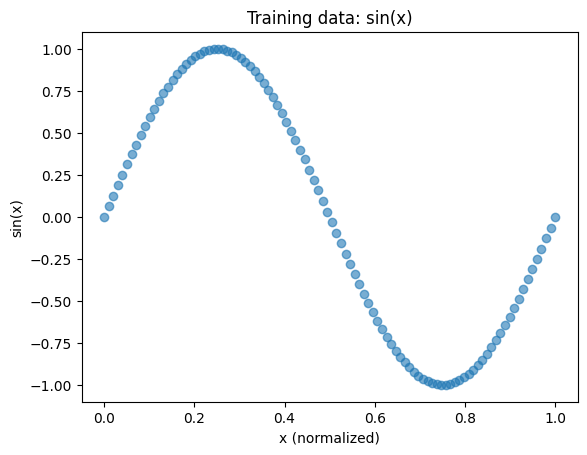

In [209]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input x in a small interval (e.g., 0 to 2π)
x = np.linspace(0, 2 * np.pi, 100)
x_norm = (x - np.min(x)) / (np.max(x) - np.min(x))  # optional normalization
y = np.sin(x)

train_data = np.column_stack((x_norm, y))

plt.scatter(x_norm, y, alpha=0.6)
plt.xlabel("x (normalized)")
plt.ylabel("sin(x)")
plt.title("Training data: sin(x)")
plt.show()


In [210]:
nn = NeuralNetwork()
nn.train_in_batch(train_data)


Updated weights: [np.float64(0.1997423949755159), np.float64(0.7522639564303454)]
Updated weights: [np.float64(0.21696107105175988), np.float64(0.7568358883544758)]
Updated weights: [np.float64(0.2522660693548866), np.float64(0.7669567221616318)]
Updated weights: [np.float64(0.2909938691156856), np.float64(0.7796950026122997)]
Updated weights: [np.float64(0.3045497189235693), np.float64(0.7847542490760208)]
Updated weights: [np.float64(0.2658547553445759), np.float64(0.7697373946969391)]
Updated weights: [np.float64(0.17163779996894965), np.float64(0.7371963933200216)]
Updated weights: [np.float64(0.05196621410972449), np.float64(0.7093338482753173)]
Updated weights: [np.float64(-0.04616226322509624), np.float64(0.7021448984235075)]
Updated weights: [np.float64(-0.07844617702021714), np.float64(0.7042673926976848)]


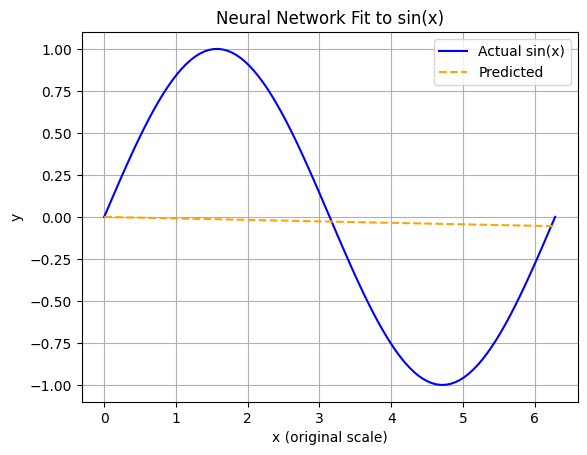

In [211]:
import numpy as np
import matplotlib.pyplot as plt

# Denormalize x for plotting
x_min, x_max = 0, 2 * np.pi  # since you likely used x = np.linspace(0, 2π, ...)
x_norm = train_data[:, 0]
x_denorm = x_norm * (x_max - x_min) + x_min

# Actual y values
y_actual = np.sin(x_denorm)

# Predicted y values
y_pred = np.array([nn.forward_pass(xi) for xi in x_norm])

# Plot
plt.plot(x_denorm, y_actual, label='Actual sin(x)', color='blue')
plt.plot(x_denorm, y_pred, label='Predicted', color='orange', linestyle='--')

plt.xlabel("x (original scale)")
plt.ylabel("y")
plt.title("Neural Network Fit to sin(x)")
plt.legend()
plt.grid(True)
plt.show()


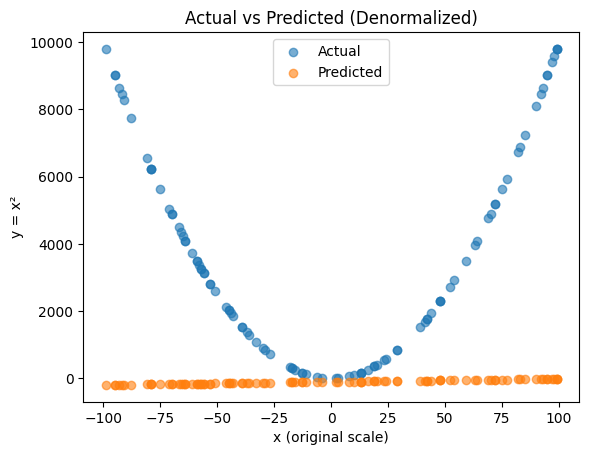

In [208]:
x_denorm = x_norm * (x_max - x_min) + x_min
y_actual = x_denorm ** 2
y_pred_norm = np.array([nn.forward_pass(xi) for xi in x_norm])
y_pred = y_pred_norm * (y_max - y_min) + y_min

plt.scatter(x_denorm, y_actual, alpha=0.6, label='Actual')
plt.scatter(x_denorm, y_pred, alpha=0.6, label='Predicted')
plt.xlabel("x (original scale)")
plt.ylabel("y = x²")
plt.title("Actual vs Predicted (Denormalized)")
plt.legend()
plt.show()


# fuck this shit ill just use keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Generate training data
x_train = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y_train = np.sin(x_train)

# Reshape for Keras (expects 2D input)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# Step 2: Build the model
model = keras.Sequential([
    layers.Dense(64, activation='tanh', input_shape=(1,)),
    layers.Dense(64, activation='tanh'),
    layers.Dense(1)  # Output layer for regression
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='mse')

# Step 4: Train the model
history = model.fit(x_train, y_train, epochs=300, verbose=0)

# Step 5: Make predictions
x_test = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)
y_pred = model.predict(x_test)

# Step 6: Plot the results
plt.figure(figsize=(10, 5))
plt.plot(x_test, np.sin(x_test), label='True sin(x)')
plt.plot(x_test, y_pred, label='NN approximation')
plt.legend()
plt.title("Approximating sin(x) with a Neural Network")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
